# Determining intrinsic $P(k)$ from gridded data

[Jing 1995](http://adsabs.harvard.edu/abs/2005ApJ...620..559J) worked out how to determine the true power $P(k)$ from a gridded Fourier transform.

In [2]:
%matplotlib inline
from array_io import *
import numpy as np
import matplotlib.pyplot as plt
from read_grid_fft import *

36
2097152
(64, 64, 64)


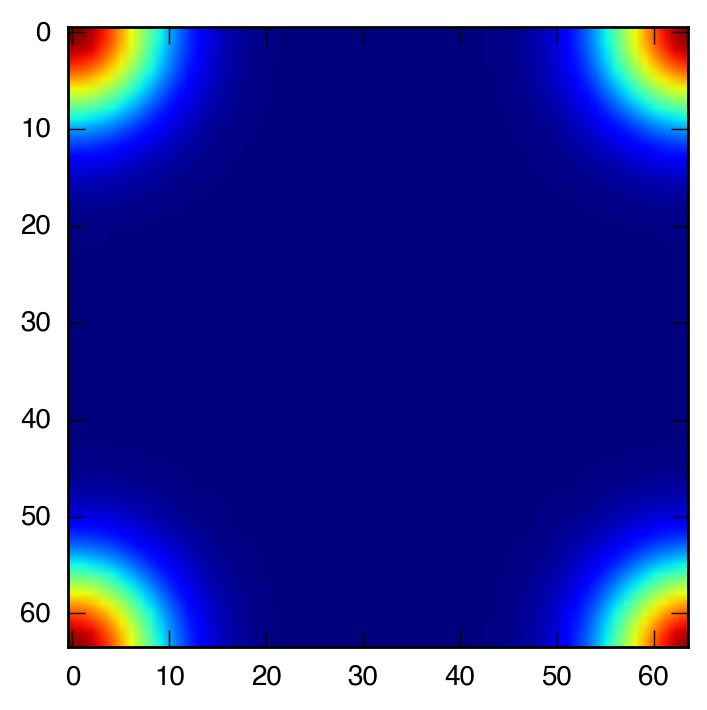

In [71]:
#Read in an ngp grid

idx = 0
fdir = "continuous/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:nx/2])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

64
6.4


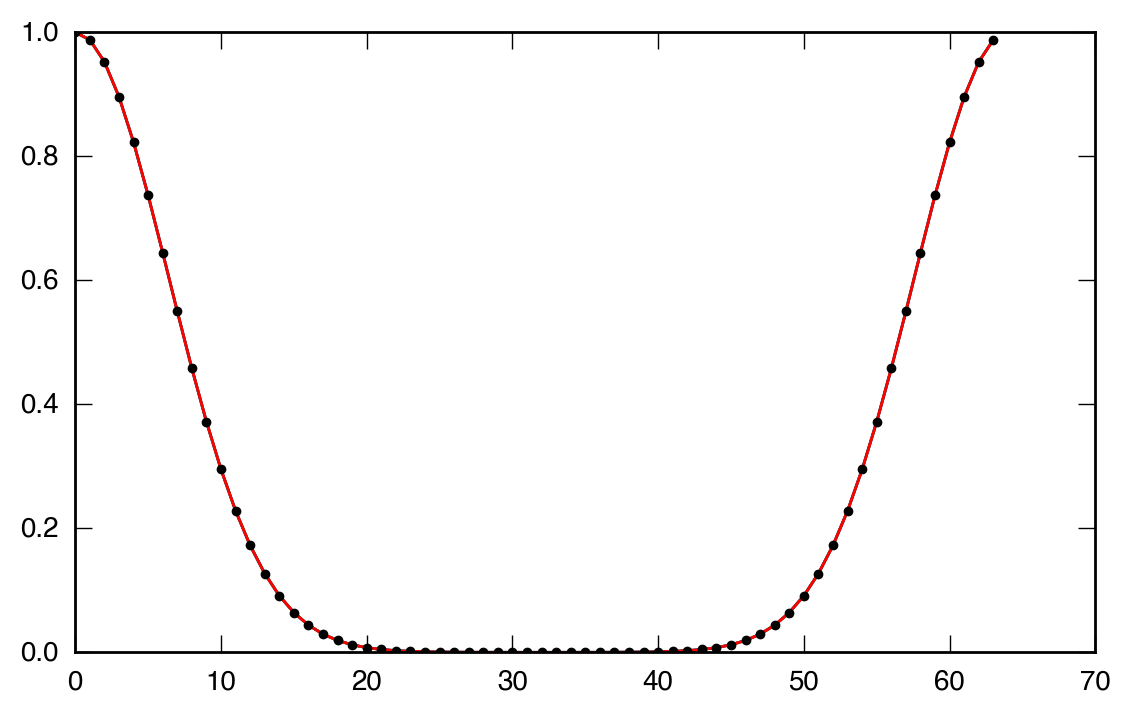

In [76]:
print nx
sigma = 0.1 * nx
print sigma
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

g = np.exp(-0.5*x**2 / sigma**2 )
g += np.exp(-0.5*(x-nx)**2 / sigma**2 )
plt.plot(x,g,'.',color='0')



36
2097152
(64, 64, 64)


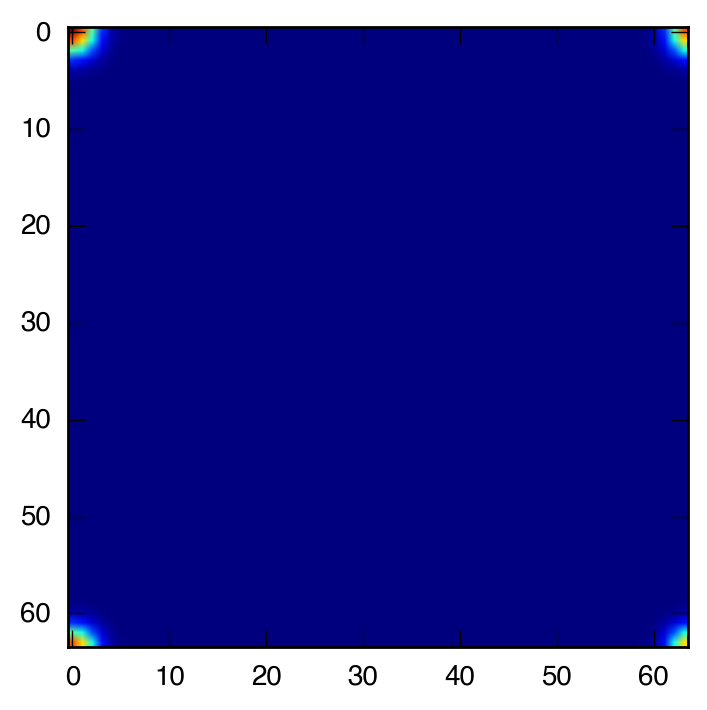

In [72]:
#Read in a delta^f_k grid

idx = 0
fdir = "continuous/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

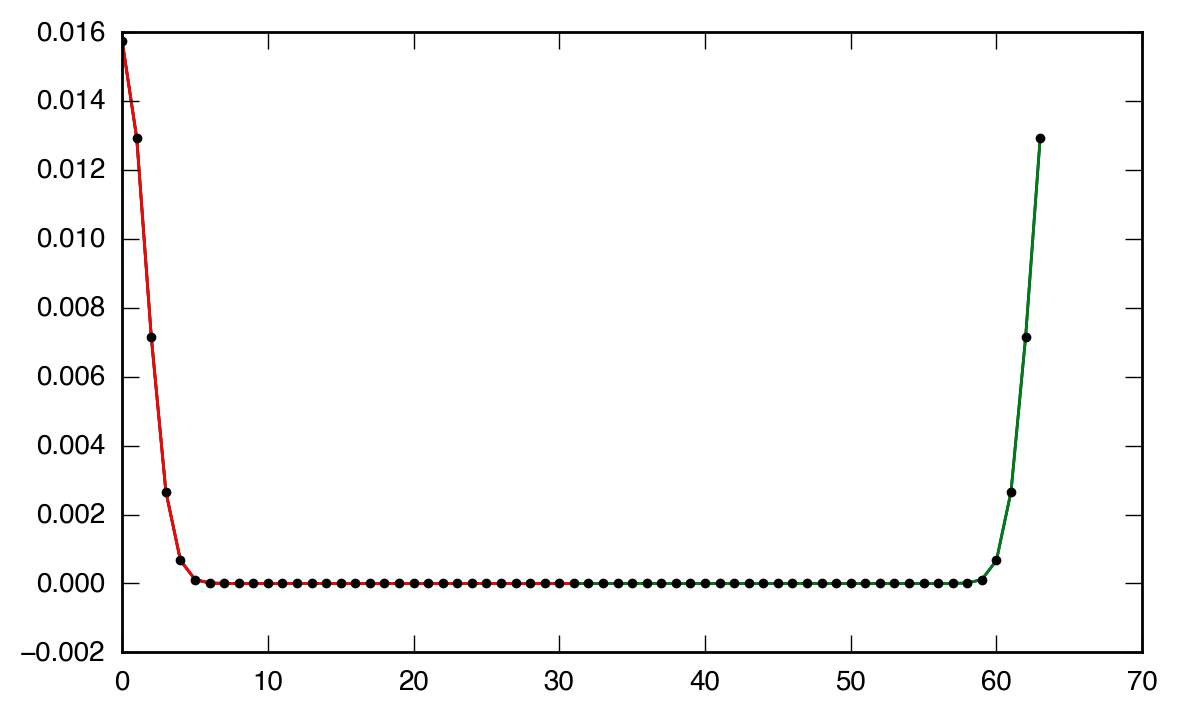

In [77]:

plt.plot(x,dfk[:,0,0])
plt.plot(x,dfk[0,:,0])
plt.plot(x[:nz/2],dfk[0,0,:nz/2])


a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
B = np.sqrt( np.pi / a)
g = B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
g += B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2
plt.plot(x,g,'.',color='0')



# Start of gridding

# Below I'm showing the particle positions

6.046278e-06 0.9999976
1.400952e-06 0.9999933
4.271631e-07 0.9999973


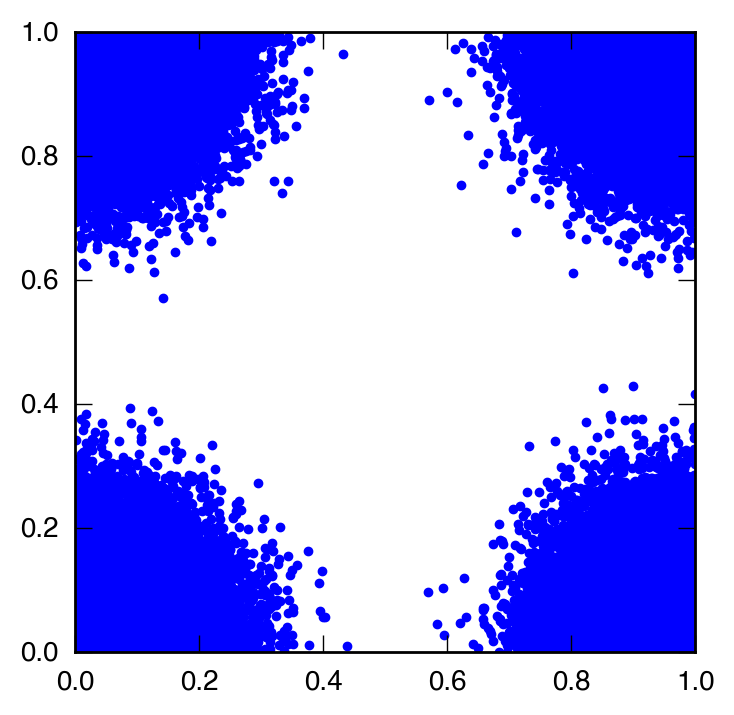

In [83]:
idx = 0
fdir = "particles/"
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.')
plt.axes().set_aspect('equal')
print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()
                    

# Below I'm showing the gridded particles

36
2097152
(64, 64, 64)


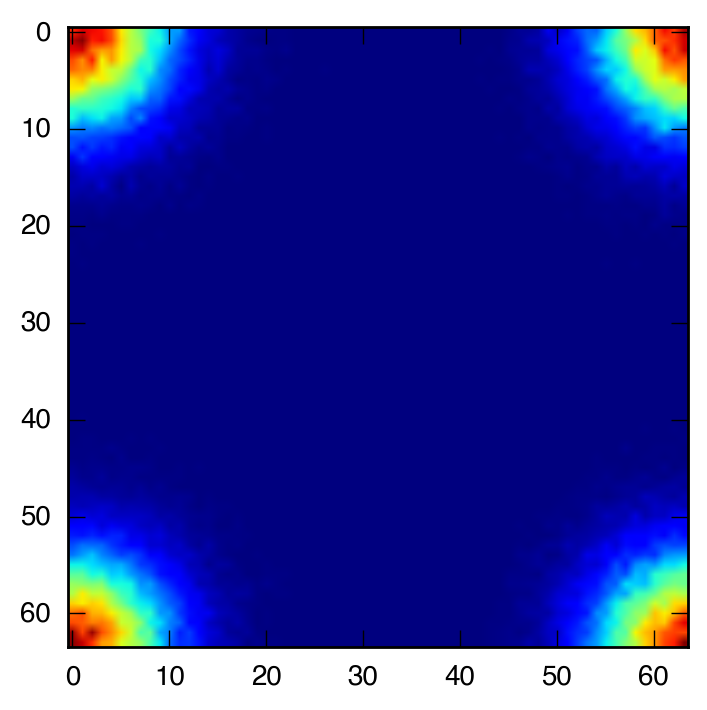

In [84]:
#Read in an ngp grid

idx = 0
fdir = "particles/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

64
6.4
100000


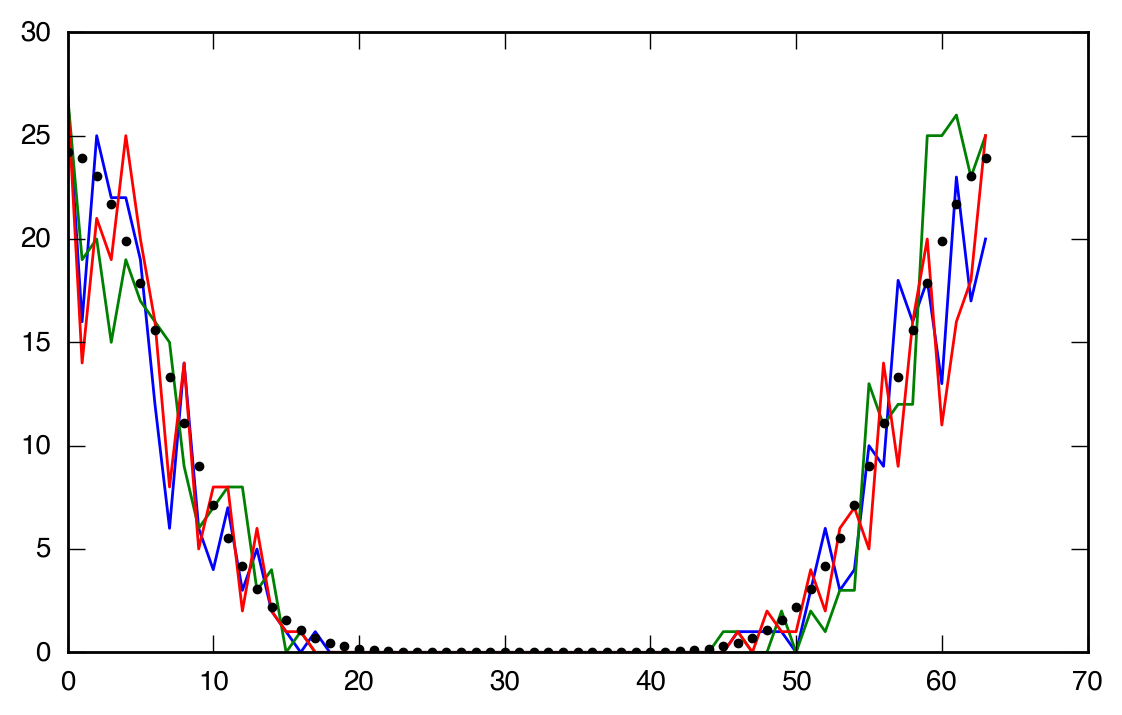

In [85]:

print nx
sigma = 0.1 * nx 
print sigma
print N
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

A = N / (2.*np.pi*sigma**2)**1.5
g = A*np.exp(-0.5*x**2 / sigma**2 )
g += A*np.exp(-0.5*(x-nx)**2 / sigma**2 )
plt.plot(x,g,'.',color='0')

36
2097152
(64, 64, 64)


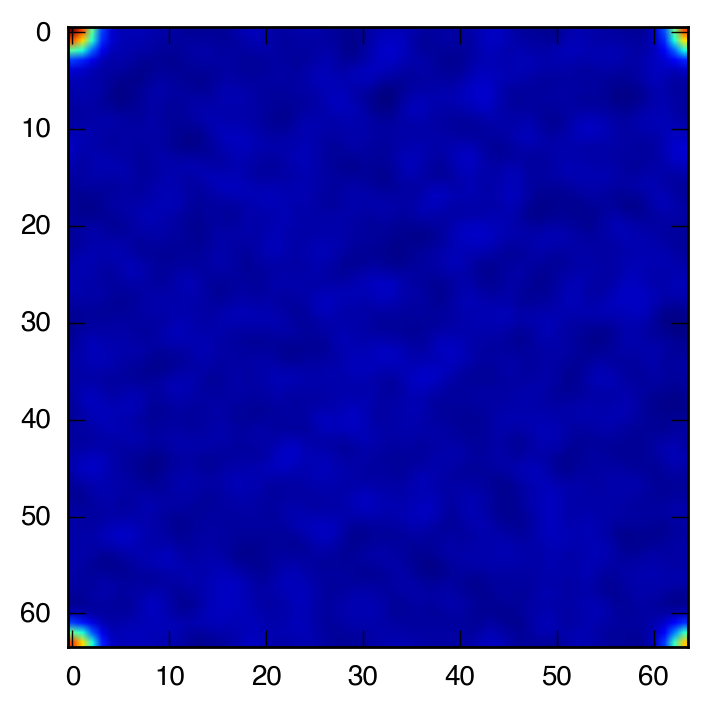

In [86]:
#Read in a delta^f_k grid

idx = 0
fdir = "particles/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

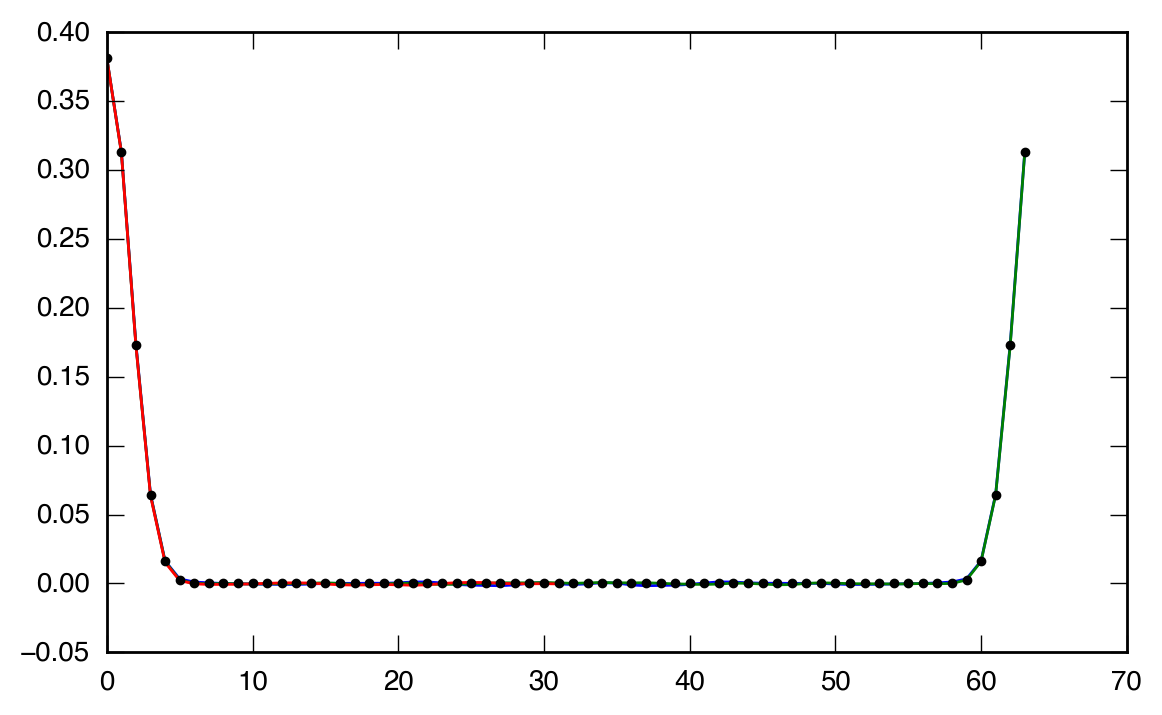

In [87]:
plt.plot(x,dfk[:,0,0])
plt.plot(x,dfk[0,:,0])
plt.plot(x[:nz/2],dfk[0,0,:nz/2])

sk = np.sqrt(2)*sigma
a = (float(nx)/(np.pi*sk))**2


A = N / (2.*np.pi*sigma**2)**1.5

a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
B = np.sqrt( np.pi / a)
g = A*B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
g += A*B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2

plt.plot(x,g,'.',color='0')



# Now a uniform grid of particles

36
2097152
(64, 64, 64)


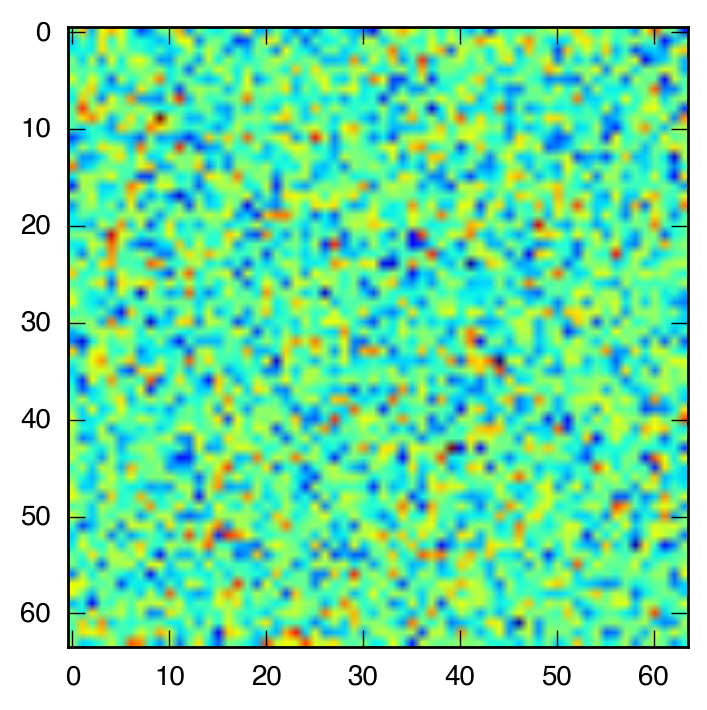

In [240]:
#Read in an ngp grid

idx = 0
fdir = "uniform/"
fname = fdir+"ngp.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,ngp = read_grid_fft(fname)
print (nx,ny,nz)
ngpp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        ngpp[i,j] = np.sum(ngp[i,j,:])

#plt.imshow(ngp[:,:,0].T)
plt.imshow(ngpp.T)

1.310837e-06 0.9999893
4.537869e-06 0.9999997
1.814775e-05 0.9999986


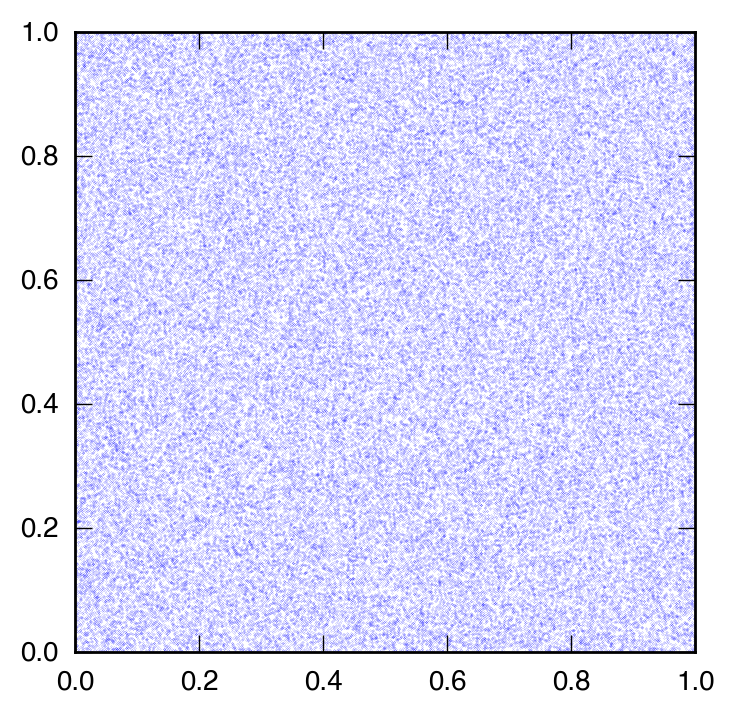

In [241]:
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
plt.plot(x,y,'.',markersize=0.1)
plt.axes().set_aspect('equal')
print x.min(), x.max()
print y.min(), y.max()
print z.min(), z.max()

64
6.4
0.381469726562


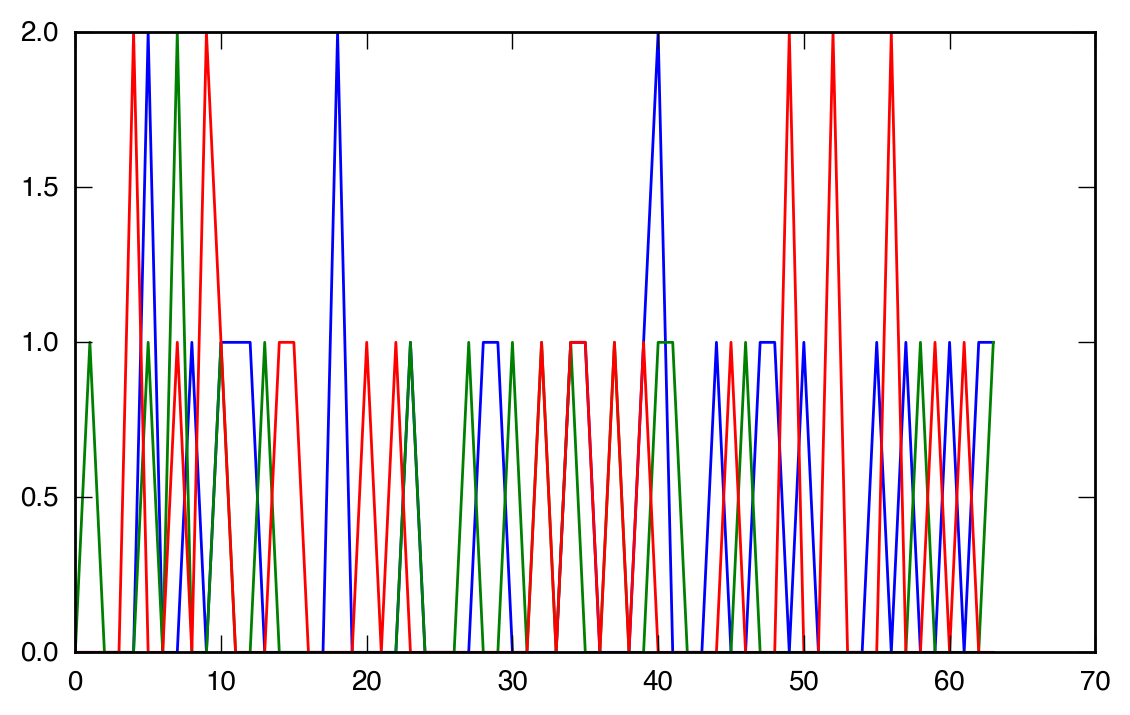

In [242]:

print nx
sigma = 0.1 * nx 
print sigma
x = np.arange(nx)
plt.plot(x,ngp[:,0,0])
plt.plot(x,ngp[0,:,0])
plt.plot(x,ngp[0,0,:])

A = N / float(nx*ny*nz)

print A

#A = N / (2.*np.pi*sigma**2)**1.5
#g = A*np.exp(-0.5*x**2 / sigma**2 )
#g += A*np.exp(-0.5*(x-nx)**2 / sigma**2 )
#plt.plot(x,g,'.',color='0')

36
2097152
(64, 64, 64)


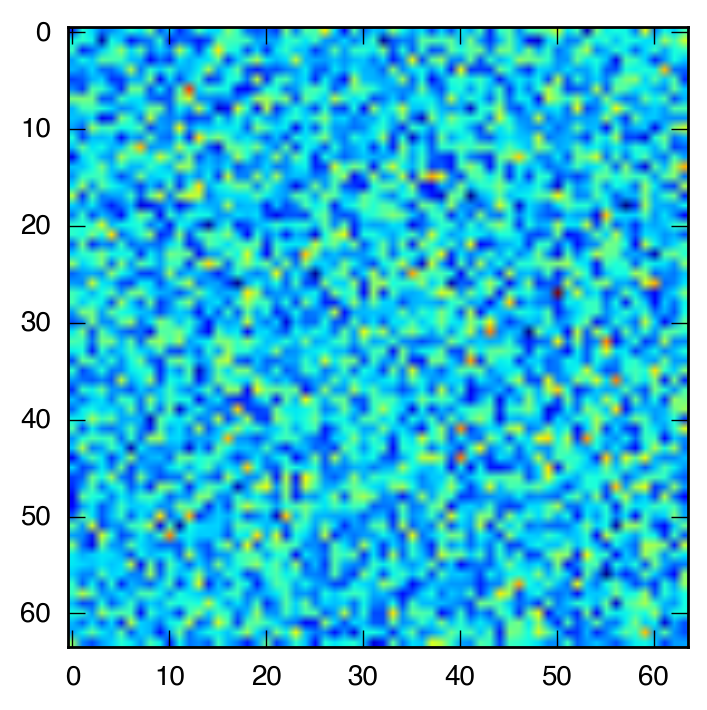

In [243]:
#Read in a delta^f_k grid

idx = 0
fdir = "uniform/"
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
print(nx,ny,nz)
dfkp = np.zeros([nx,ny])
for i in range(ixmin,ixmax,1):
    for j in range(iymin,iymax,1):
        dfkp[i,j] = np.sum(dfk[i,j,:])

plt.imshow(dfkp.T)

[ 0.          0.00053813  0.00176324  0.00353596  0.00396388  0.00332793
  0.00462977  0.00408402  0.00264999  0.00133401  0.00531531  0.00147275
  0.00206843  0.00302945  0.00226254  0.00222344  0.00479877  0.00696181
  0.00138877  0.00244742  0.00440362  0.00459662  0.00434824  0.00090975
  0.0057829   0.00129399  0.00120166  0.00297158  0.00143883  0.00144626
  0.00284366  0.0024005   0.0039      0.0024005   0.00284366  0.00144626
  0.00143883  0.00297158  0.00120166  0.00129399  0.0057829   0.00090975
  0.00434824  0.00459662  0.00440362  0.00244742  0.00138877  0.00696181
  0.00479877  0.00222344  0.00226254  0.00302945  0.00206843  0.00147275
  0.00531531  0.00133401  0.00264999  0.00408402  0.00462977  0.00332793
  0.00396388  0.00353596  0.00176324  0.00053813]


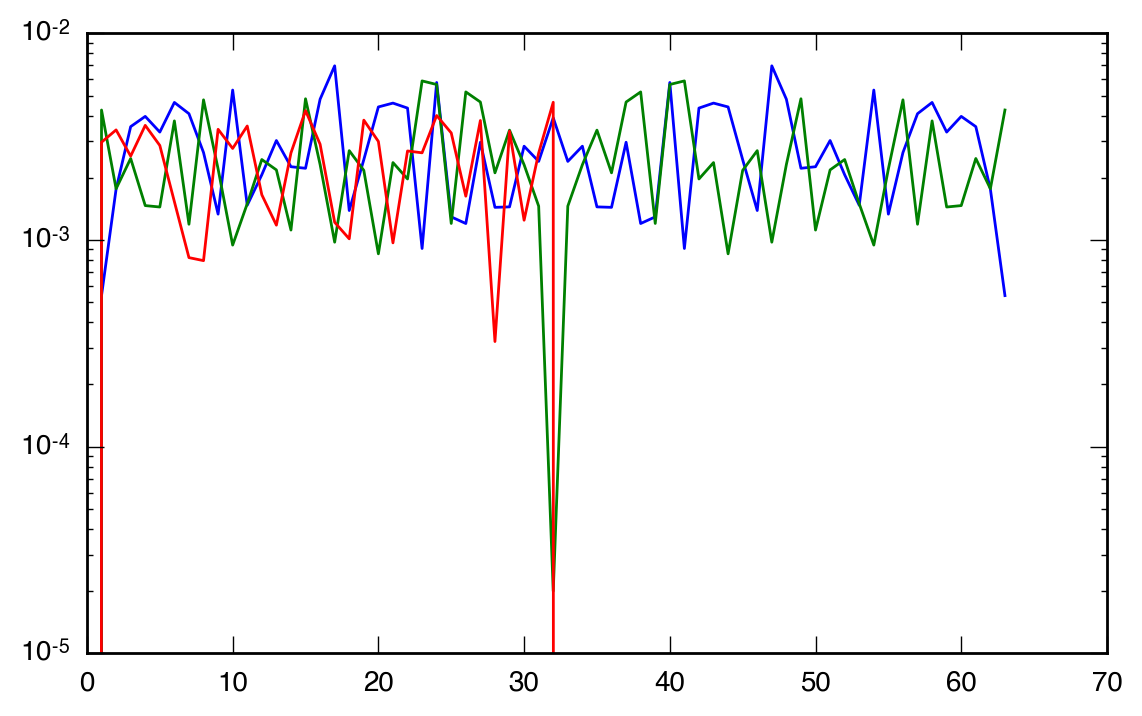

In [244]:
plt.plot(x,dfk[:,0,0]**0.5)
plt.yscale('log')
plt.plot(x,dfk[0,:,0]**0.5)
plt.plot(x,dfk[0,0,:]**0.5)

print dfk[:,0,0]**0.5

#sk = np.sqrt(2)*sigma
#a = (float(nx)/(np.pi*sk))**2


#A = N / (2.*np.pi*sigma**2)**1.5

#a = (float(nx)/(np.pi*np.sqrt(2)*sigma))**2
#B = np.sqrt( np.pi / a)
#g = A*B*np.exp(-1.  * x**2 / a) * (np.sqrt(2)*sigma/nx)**2
#g += A*B*np.exp(-1.  * (x-nx)**2 / a) * (np.sqrt(2)*sigma/nx)**2

#plt.plot(x,g,'.',color='0')



100000
[  0.00000000e+00   9.07759118e-06   5.95499359e-06   8.37862242e-06
   1.02430713e-05   7.12751537e-06   1.26654542e-05   6.25836146e-06
   1.01244951e-05   6.14694630e-06   1.22784231e-05   5.69909645e-06
   4.34246187e-06   5.11249765e-06   4.44122493e-06   1.53590039e-05
   1.22870667e-05   1.69676235e-05   3.42651959e-06   8.38834702e-06
   9.70502517e-06   9.22686909e-06   1.00247680e-05   1.41476494e-05
   2.71448382e-05   4.66375883e-06   1.04013384e-05   1.49333382e-05
   2.21370832e-06   8.32080529e-06   4.99661157e-06   4.94610720e-06
   1.22466667e-05   2.62957552e-06   4.47860731e-06   4.55329701e-06
   2.17900994e-06   1.01546347e-05   9.51643197e-06   1.04009957e-06
   2.18056919e-05   1.18217558e-05   7.60092221e-06   8.91420617e-06
   6.70891397e-06   3.56970669e-06   3.08431809e-06   1.64731215e-05
   9.46973333e-06   9.40227851e-06   2.12232481e-06   4.64843314e-06
   3.42878158e-06   1.47087863e-06   9.71517335e-06   2.21802562e-06
   9.91404145e-06   6.03324

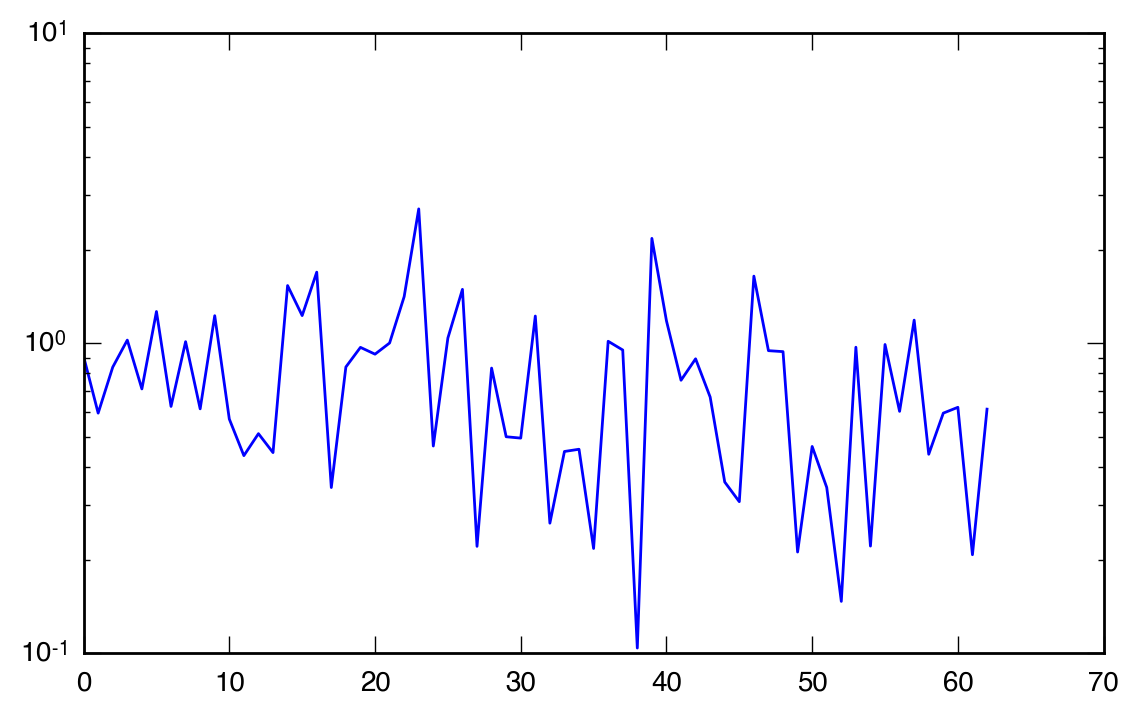

In [245]:
dfk_ave = np.zeros(nx)
for i in range(nx):
    dfk_ave[i] += dfk[i,0,0]
    dfk_ave[i] += dfk[0,i,0]
    dfk_ave[i] += dfk[0,0,i]
    
#dfk_ave[0] = 0

print N
dfk_ave*=1./3.0

#plt.plot(dfk_ave[1:]/N)
plt.plot(dfk_ave[1:]*N)


plt.yscale('log')
print(dfk_ave)
print np.mean(dfk_ave[1:] * N)


## Average $\delta^f(k)$ over multiple realizations

100000
33


/Library/Python/2.7/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Library/Python/2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[ 0.          0.04070942  0.02616035  0.01876941  0.01556321  0.01220944
  0.01192504  0.00938445  0.00885525  0.00775044  0.00713158  0.00664976
  0.00598945  0.00548996  0.0053451   0.00488221  0.00469808  0.00433075
  0.00416283  0.00393295  0.00376932  0.00360021  0.0034596   0.00328232
  0.0032056   0.00300696  0.0029335   0.00280909  0.00276672  0.0026148
  0.00258919  0.00243647  0.00239679]
[ 0.          1.07707007  1.01318592  0.99318359  0.97192193  0.99938557
  1.01887549  0.98871342  1.00965351  1.00457207  0.99842097  1.00409162
  0.99684246  0.99881063  1.00140454  1.00174644  0.99661344  1.00170473
  0.99907965  1.00193747  1.00153269  1.00160921  1.00507115  1.00097396
  1.00300023  0.99955924  0.99954402  1.00343981  0.99601808  1.00184617
  0.99977488  0.99716724  0.99228179]


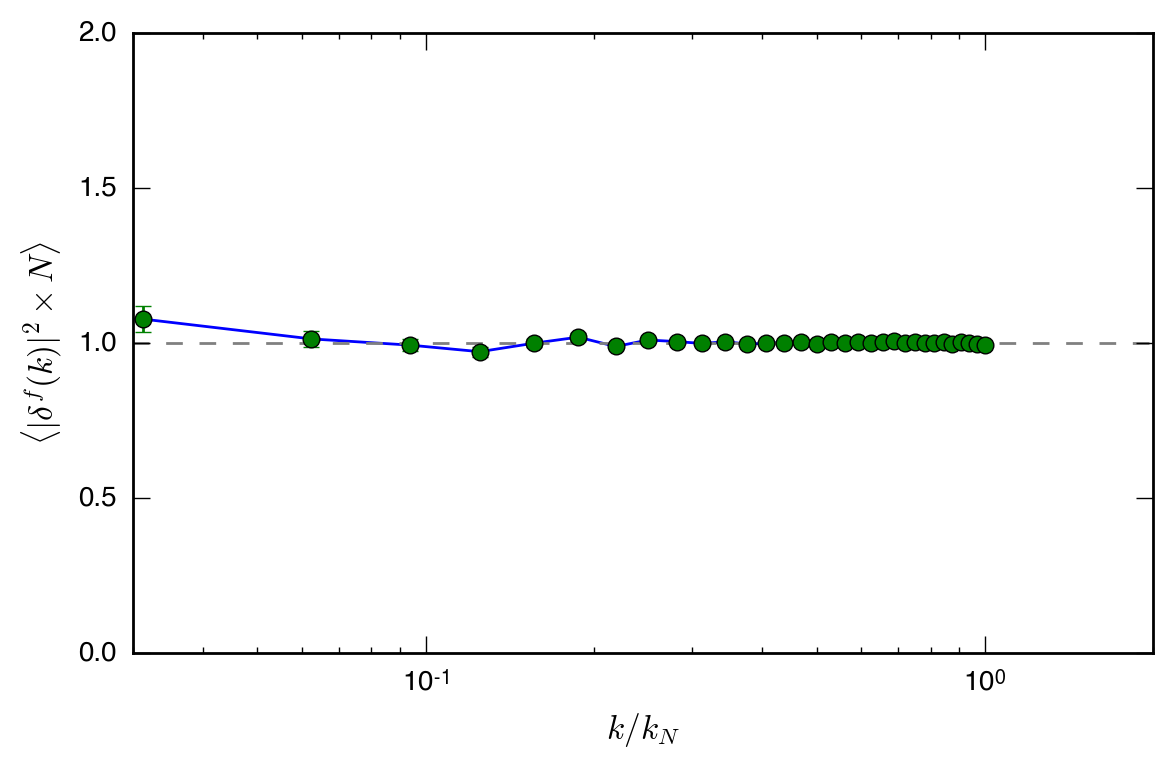

In [8]:
fdir  = "uniform/"

#get N
idx = 0
fname=fdir+"particles.%d.dat" % idx
x,y,z = read_three_arrays(fname)
N = len(x)
print(N)

#create dfk^2 array
fname = fdir+"dfk.%d.dat" % idx
nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)

nk = nz/2 + 1
print(nk)
nk_array = np.zeros(nk)
dfk_array = np.zeros(nk)
k_array = np.arange(nk) / float(nk-1)



for i in range(0,nx/2+1):
    for j in range(0,ny/2+1):
        for k in range(0,nz/2+1):
            if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                kk = (i*i + j*j + k*k)**0.5
                #print kk, int(kk), nz/2
                nk_array[kk] += 1.0
                dfk_array[kk] += dfk[i,j,k]

nreal = 100
for ir in range(1,nreal,1):
    #print ir
    fname = fdir+"dfk.%d.dat" % ir
    nx,ny,nz,ixmin,ixmax,iymin,iymax,izmin,izmax,dfk = read_grid_fft(fname)
    for i in range(0,nx/2+1):
        for j in range(0,ny/2+1):
            for k in range(0,nz/2+1):
                if( int((i*i + j*j + k*k)**0.5) <= nz/2 ):
                    kk = (i*i + j*j + k*k)**0.5
                    nk_array[kk] += 1.0
                    dfk_array[kk] += dfk[i,j,k]
plt.plot(k_array,dfk_array/nk_array * float(N))
yerr = dfk_array*N /nk_array/ (nk_array)**0.5
print yerr
y_array = np.zeros(nk)
x_array = np.zeros(nk)
x_array[:] = k_array
x_array[-1] = 2.
y_array[:] = 1.0
plt.plot(x_array,y_array,'-',linestyle="--",color='0.5')
plt.errorbar(k_array, dfk_array/nk_array * float(N), yerr=yerr, fmt='o')
plt.ylim([0,2])
plt.xlim([0.03,2])
plt.xscale('log')
plt.axes().set_aspect('2.')
plt.ylabel(r'$\langle |\delta^f(k)|^2 \times N\rangle$')
plt.xlabel(r'$k/k_{N}$')
print dfk_array/nk_array * float(N)
